## Observations and Insights 

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
raw_merge = pd.merge(study_results,mouse_metadata, on="Mouse ID", how = "outer")

# Display the data table for preview
raw_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice.
len(raw_merge["Mouse ID"].value_counts())

249

In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = raw_merge.loc[raw_merge.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

In [19]:
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicate_mice) # Pointer to data

['g989']


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_data = raw_merge.loc[raw_merge['Mouse ID'].isin(duplicate_mice) == False]
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [17]:
# Checking the number of mice in the clean DataFrame.
count = merged_data["Mouse ID"].value_counts()
len(count)

248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

tumor_table = merged_data[["Drug Regimen", "Tumor Volume (mm3)"]]

# Find median
tumor_table = tumor_table.sort_values(by=["Drug Regimen", "Tumor Volume (mm3)"])

# Group by
tumor_stats = tumor_table.groupby(["Drug Regimen"]).mean()
tumor_stats["Median"] = tumor_table.groupby(["Drug Regimen"]).median()
tumor_stats["Variance"] = tumor_table.groupby(["Drug Regimen"]).var()
tumor_stats["Standard Deviation"] = tumor_table.groupby(["Drug Regimen"]).std()
tumor_stats["SEM"] = tumor_table.groupby(["Drug Regimen"]).sem()

# Format
tumor_stats = tumor_stats.rename(columns = {"Tumor Volume (mm3)": "Mean"})
tumor_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

tumor_agg_table = tumor_table.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
tumor_agg_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

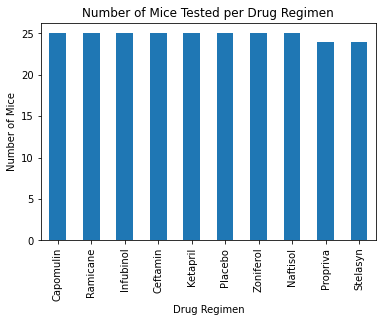

In [24]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mouse_table = merged_data[["Mouse ID", "Drug Regimen"]]

# Drop duplicate mice
unique_mouse_table = mouse_table.drop_duplicates(["Mouse ID"])

# Count per drug regimen
mouse_count_data = pd.DataFrame(unique_mouse_table["Drug Regimen"].value_counts())

# Create bar plot
mouse_panda_plot = mouse_count_data.plot.bar(title="Number of Mice Tested per Drug Regimen", legend=False)
mouse_panda_plot.set_xlabel("Drug Regimen")
mouse_panda_plot.set_ylabel("Number of Mice")

plt.show()

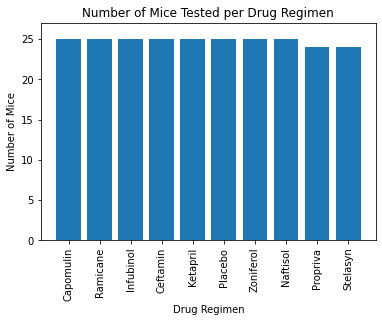

In [25]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Reset index
py_bar_data = mouse_count_data.reset_index(drop=False)

# Rename columns
py_bar_data = py_bar_data.rename(columns = {"index": "Drug", "Drug Regimen": "Mice Count"})

# Create bar plot
plt.bar(py_bar_data["Drug"], py_bar_data["Mice Count"])

# Format
plt.title("Number of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.ylim(0, 27)
plt.xticks(rotation = "vertical")

plt.show()

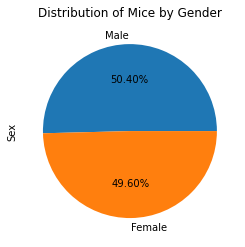

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Unique mice df
unique_merged_data = pd.DataFrame(merged_data)
unique_merged_data = unique_merged_data.drop_duplicates(["Mouse ID"])

# Create and format pie plot
gender_count = unique_merged_data["Sex"].value_counts()
gender_graph = gender_count.plot(kind = "pie", autopct = "%1.2f%%")
gender_graph.set_title("Distribution of Mice by Gender")

plt.show()

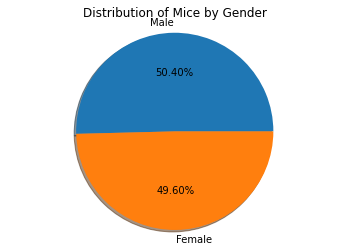

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders = ["Male", "Female"]
counts = [125, 123]
plt.pie(counts, labels = genders, autopct="%1.2f%%", shadow=True, startangle=0)
plt.axis("equal")
plt.title("Distribution of Mice by Gender")

plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

mouse_group = merged_data.groupby("Mouse ID")
max_timepoint = mouse_group["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_merge = pd.merge(max_timepoint, merged_data, how = "left", on = ["Mouse ID", "Timepoint"])
tumor_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes
    
for drug in treatments_list:
    tumors = tumor_merge.loc[tumor_merge["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol_list.append(tumors)
    
    # add subset 

    quartiles = tumors.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Determine outliers using upper and lower bounds

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    tumor_outliers = tumors.loc[(tumors < lower_bound) | (tumors > upper_bound)]

    if (tumor_outliers.sum() > 0):
        print(f"{drug} has outliers: {tumor_outliers}")
    else:
        print(f"{drug} shows no outliers.")

Capomulin shows no outliers.
Ramicane shows no outliers.
Infubinol has outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin shows no outliers.


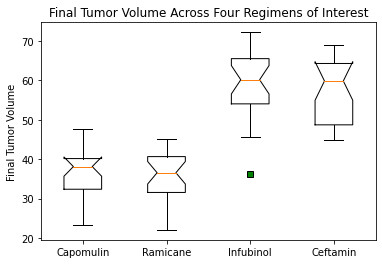

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume Across Four Regimens of Interest")
ax1.boxplot(tumor_vol_list, treatments_list, showfliers = True, flierprops = {'markerfacecolor': 'g', 'marker': 's'})
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
ax1.set_ylabel("Final Tumor Volume")

plt.show()

## Line and Scatter Plots

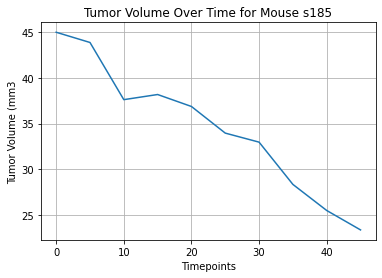

In [36]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Mouse s185 is treated with Capomulin
s185_data = merged_data[merged_data["Mouse ID"] == "s185"]
s185_data = s185_data.set_index("Timepoint")
s185_volume = pd.DataFrame(s185_data["Tumor Volume (mm3)"])

# Create plot
s185_volume.plot(grid = True, legend = False)

# Format
plt.title("Tumor Volume Over Time for Mouse s185")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3")
plt.show()

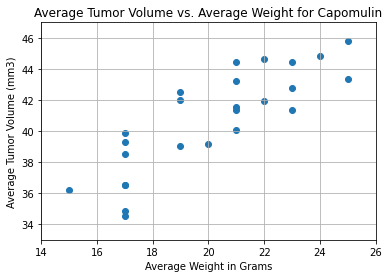

In [37]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Capomulin df
capomulin_df = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]
capomulin_df.head()

# Get avgs for Weight and Tumor Volume
capomulin_groups = capomulin_df.groupby("Mouse ID")
weight_avg = capomulin_groups["Weight (g)"].mean()
tumor_avg = capomulin_groups["Tumor Volume (mm3)"].mean()

# Create and format plot
plt.scatter(weight_avg, tumor_avg)
plt.title("Average Tumor Volume vs. Average Weight for Capomulin")
plt.xlabel("Average Weight in Grams")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(14, 26)
plt.ylim(33, 47)
plt.grid(True)
plt.show()

## Correlation and Regression

 The correlation coefficient between weight and tumor volume is 0.84
 The r-squared is: 0.7088568047708717


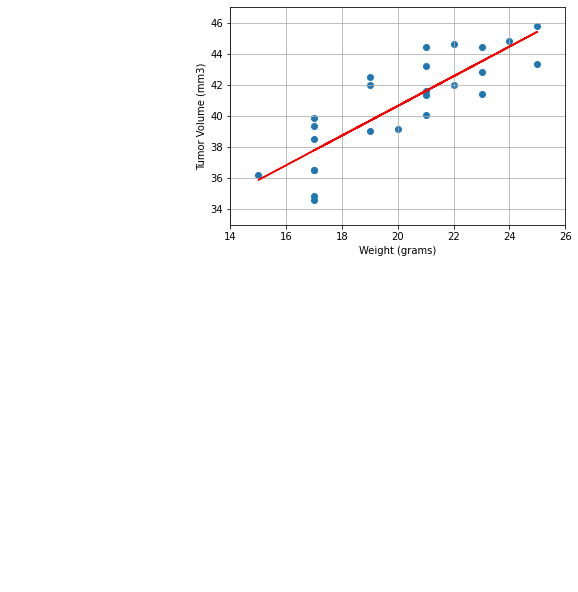

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = weight_avg
y_values = tumor_avg
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (grams)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(14, 26)
plt.ylim(33, 47)

print(f" The correlation coefficient between weight and tumor volume is {round(st.pearsonr(weight_avg, tumor_avg)[0],2)}")
print(f" The r-squared is: {rvalue**2}")
plt.grid(True)

plt.show()